In [1]:
# This notebook carries out calculations for the example in Table 5.2 of Chapter 5 

In [2]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Income = pd.DataFrame([30, 55, 63, 35, 28, 140, 100, 60, 64, 63])
Credit = pd.DataFrame([40, 140, 30, 80, 100, 30, 30, 90, 120, 150])
Loan = pd.DataFrame([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

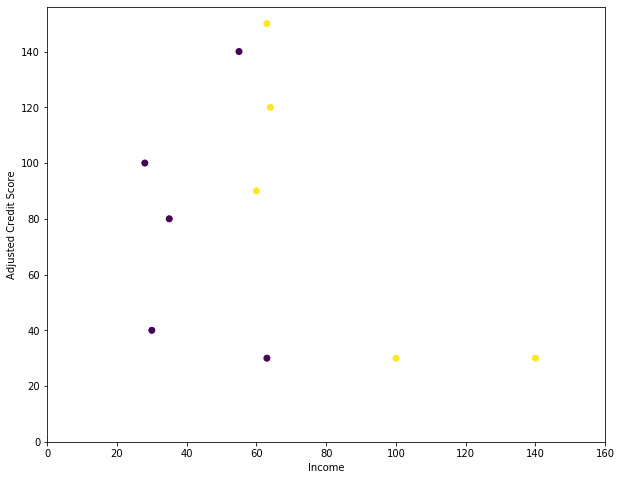

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(Income, Credit, c=Loan)
plt.xlabel('Income')
plt.ylabel('Adjusted Credit Score')
axes = plt.gca()
axes.set_xlim([0,160])
axes.set_ylim([0,None])
plt.show()

#### Note that the objective function of SVC is $C\sum_{j=1}^n z_j+\frac{1}{2}\sum_{j=1}^nw_j^2$.   If our objective function is $C\sum_{j=1}^n z_j+\sum_{j=1}^nw_j^2$, then we to set $C=C/2$ in SVC.

In [5]:
#We carry out calculations for C=0.0005 which corresponds to C=0.001 in Hull's book. 
X = np.asarray(pd.concat([Income, Credit],axis=1))
y = np.asarray(Loan).ravel()
clf = SVC(kernel='linear',C=0.0005,tol=1e-5)
clf.fit(X,y)

SVC(C=0.0005, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=1e-05, verbose=False)

In [6]:
w = clf.coef_[0]
b = -clf.intercept_[0]
print(w)
print(b)

[0.03966939 0.01223137]
3.3338794844487154


#### The outer lines are $w_1x_1+w_2x_2 = b_u$ and $w_1x_1+w_2x_2=b_d$.  The middle line is $w_1x_1+w_2x_2=b$, where $b_u=b+1$ and $b_d=b-1$.  The width of the path is $\frac{2}{\sqrt{w_1^2+w_2^2}}$.

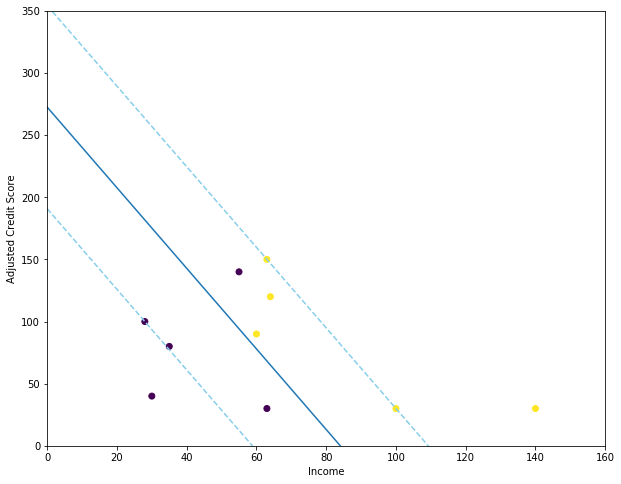

In [7]:
x1 = np.linspace(0,160,100)
w1 = w[0]
w2 = w[1]
bu = b+1
bd = b-1
y1 = (bu-w1*x1)/w2
y2 = (bd-w1*x1)/w2
y0 = (b-w1*x1)/w2
plt.figure(figsize=(10,8))
plt.scatter(Income, Credit, c=Loan)
plt.plot(x1,y1,'--',color='skyblue')
plt.plot(x1,y2,'--',color='skyblue')
plt.plot(x1,y0,'-')
plt.xlabel('Income')
plt.ylabel('Adjusted Credit Score')
axes = plt.gca()
axes.set_xlim([0,160])
axes.set_ylim([0, 350])
plt.show()

#### For different values of $C$ and find out the loans misclassified as well as width of pathway

In [8]:
# The values of C are those in Hull's book. We divide them by 2 to get corresponding values for Sklearn
for C in [0.01, 0.001, 0.0005, 0.0003, 0.0002]:
    clf = SVC(kernel='linear',C=C/2,tol=1e-6)
    clf.fit(X,y)
    S = clf.score(X,y)
    w = clf.coef_[0]
    b = -clf.intercept_[0]
    P = 2/np.sqrt(w[0]**2+w[1]**2)
    sum = 0
    for i in range(len(Income)):
        if Loan.iloc[i,0] == 0:
            sum += max(w[0] * Income.iloc[i,0] + w[1] * Credit.iloc[i,0] - b,0)
        else:
            sum += max(b- w[0] * Income.iloc[i,0] - w[1] * Credit.iloc[i,0],0)
    print("C = %6.4f, w1 = %6.4f, w2 = %6.4f, b = %5.2f, Loan Misclassified = %3.0f%%, Width = %5.1f, Cent Error = %6.4f" %(C,w[0],w[1],b,100*(1-S),P,sum))

C = 0.0100, w1 = 0.0541, w2 = 0.0216, b =  5.05, Loan Misclassified =  10%, Width =  34.4, Cent Error = 0.9459
C = 0.0010, w1 = 0.0397, w2 = 0.0122, b =  3.33, Loan Misclassified =  10%, Width =  48.2, Cent Error = 0.5603
C = 0.0005, w1 = 0.0265, w2 = 0.0100, b =  2.46, Loan Misclassified =  10%, Width =  70.6, Cent Error = 0.3963
C = 0.0003, w1 = 0.0187, w2 = 0.0057, b =  1.79, Loan Misclassified =  20%, Width = 102.2, Cent Error = 0.1937
C = 0.0002, w1 = 0.0185, w2 = 0.0033, b =  1.69, Loan Misclassified =  30%, Width = 106.6, Cent Error = 0.4193


In [9]:
#We carry out calculations for C=0.00015 which corresponds to C=0.0003 in Hull's book. 
X = np.asarray(pd.concat([Income, Credit],axis=1))
y = np.asarray(Loan).ravel()
clf = SVC(kernel='linear',C=0.00015,tol=1e-5)
clf.fit(X,y)

SVC(C=0.00015, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=1e-05, verbose=False)

In [10]:
w = clf.coef_[0]
b = -clf.intercept_[0]
print(w)
print(b)

[0.0187041  0.00574508]
1.790926229508197


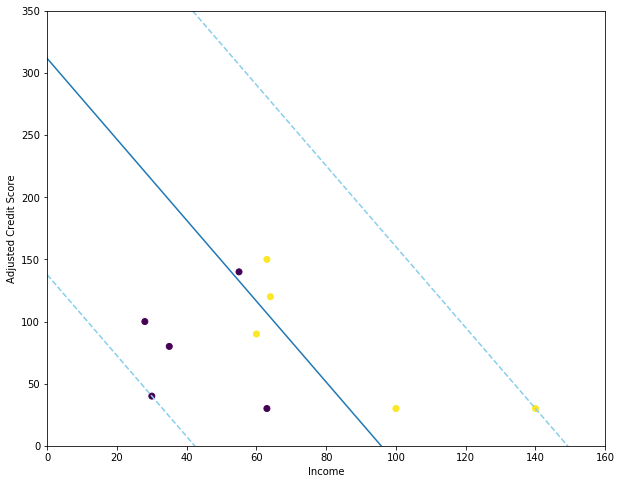

In [11]:
x1 = np.linspace(0,160,100)
w1 = w[0]
w2 = w[1]
bu = b+1
bd = b-1
y1 = (bu-w1*x1)/w2
y2 = (bd-w1*x1)/w2
y0 = (b-w1*x1)/w2
plt.figure(figsize=(10,8))
plt.scatter(Income, Credit, c=Loan)
plt.plot(x1,y1,'--',color='skyblue')
plt.plot(x1,y2,'--',color='skyblue')
plt.plot(x1,y0,'-')
plt.xlabel('Income')
plt.ylabel('Adjusted Credit Score')
axes = plt.gca()
axes.set_xlim([0,160])
axes.set_ylim([0, 350])
plt.show()